<Axes: xlabel='class'>

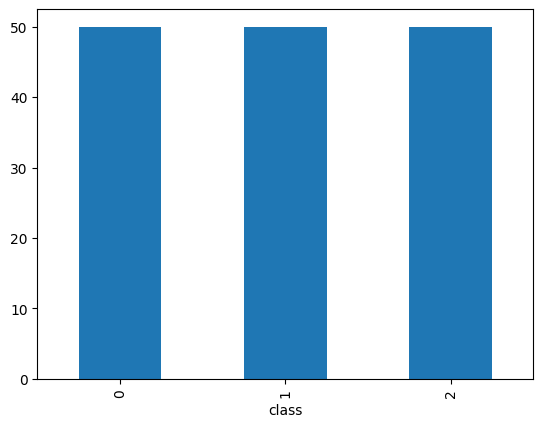

In [15]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Iris data
dataObj = load_iris()
df = pd.DataFrame(data=dataObj.data, columns=dataObj.feature_names)
df["class"] = dataObj.target
df["class"].value_counts().sort_index(ascending=True).plot(kind="bar")

<Axes: xlabel='class'>

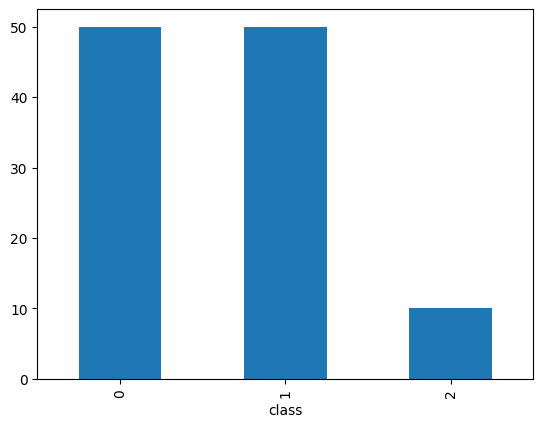

In [16]:
df0 = df[df['class'] == 2].sample(frac=0.2, random_state=1)
dfR = df[df['class'] != 2]
dfSampled = pd.concat([df0, dfR], axis=0, ignore_index=True)
dfSampled['class'].value_counts().sort_index(ascending=True).plot(kind='bar')

In [17]:
colsX = [i for i in dfSampled.columns if i != 'class']
X = dfSampled[colsX].values
y = dfSampled['class'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
display( pd.Series(data=y_train).value_counts())
display( pd.Series(data=y_test).value_counts())

# Standardize
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Constructing classifier
lr = LogisticRegression(random_state=0, C=1)

# Train and predict
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

0    35
1    35
2     7
Name: count, dtype: int64

1    15
0    15
2     3
Name: count, dtype: int64

In [18]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        15
           1     0.9375    1.0000    0.9677        15
           2     1.0000    0.6667    0.8000         3

    accuracy                         0.9697        33
   macro avg     0.9792    0.8889    0.9226        33
weighted avg     0.9716    0.9697    0.9672        33



In [19]:
# Constructing a pipeline object
lr_balanced = LogisticRegression(random_state=0, C=1, class_weight='balanced')

lr_balanced.fit(X_train_std, y_train)

y_pred = lr_balanced.predict(X_test_std)

In [20]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        15
           1     1.0000    1.0000    1.0000        15
           2     1.0000    1.0000    1.0000         3

    accuracy                         1.0000        33
   macro avg     1.0000    1.0000    1.0000        33
weighted avg     1.0000    1.0000    1.0000        33



In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
oversample = SMOTE()
X_train_os, y_train_os = oversample.fit_resample(X_train_std, y_train)

In [23]:
pd.Series(y_train_os).value_counts()

0    35
1    35
2    35
Name: count, dtype: int64

In [26]:
lr.fit(X_train_os, y_train_os)
y_pred = lr.predict(X_test_std)

In [27]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        15
           1     1.0000    1.0000    1.0000        15
           2     1.0000    1.0000    1.0000         3

    accuracy                         1.0000        33
   macro avg     1.0000    1.0000    1.0000        33
weighted avg     1.0000    1.0000    1.0000        33

